# Problem 7

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.linspace(0, 2, 100)
er = np.random.random_sample(size = 100) / 2 - 0.5

y = np.sin(x**2) + er
x = x.reshape(x.shape[0], 1)

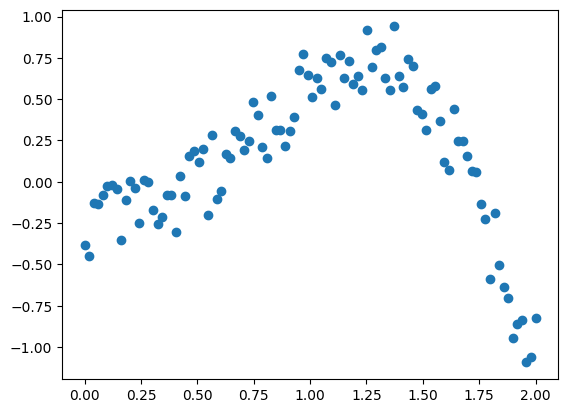

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
mse_scorer = make_scorer(mean_squared_error)

In [6]:
gammas = np.concatenate([np.linspace(0.2, 1, 9), np.linspace(2, 5, 7)])
Cs = np.concatenate([np.linspace(0.5, 1, 6), np.linspace(2, 10, 9), np.linspace(15, 70, 12)])

In [7]:
scores = np.empty(Cs.shape[0])

for i in range(Cs.shape[0]):
    regressor = SVR(kernel='linear', C=Cs[i], epsilon=0)
    scores[i] = cross_val_score(regressor, x, y, scoring=mse_scorer, cv=5).mean()

optimal_C = Cs[scores.argmin()]
print("optimal C for linear kernel: {:.1f}".format(optimal_C))
print("optimal error for linear kernel:", scores.min())

optimal C for linear kernel: 45.0
optimal error for linear kernel: 0.5364762459640318


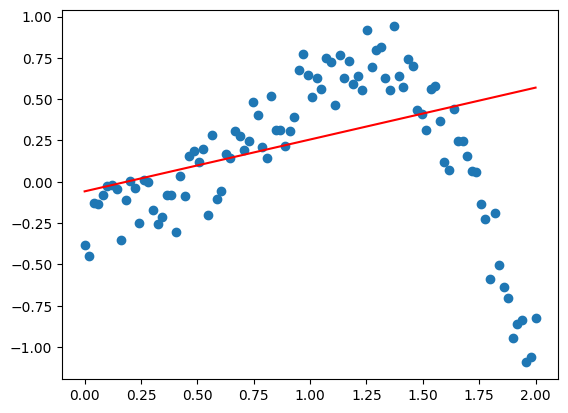

In [8]:
regressor = SVR(kernel='linear', C=optimal_C, epsilon=0)
regressor.fit(x, y)
yp = regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, yp, 'r')
plt.show()

In [9]:
scores = np.empty((Cs.shape[0], gammas.shape[0]))

for i in range(Cs.shape[0]):
    for j in range(gammas.shape[0]):
        regressor = SVR(kernel='rbf', C=Cs[i], gamma=gammas[j], epsilon=0)
        scores[i][j] = cross_val_score(regressor, x, y, scoring=mse_scorer, cv=5).mean()

i, j = np.unravel_index(scores.argmin(), scores.shape)
optimal_C = Cs[i]
optimal_G = gammas[j]
print("optimal C for rbf kernel: {:.1f}".format(optimal_C))
print("optimal gamma for rbf kernel: {:.1f}".format(optimal_G))
print("optimal error for rbf kernel:", scores.min())

optimal C for rbf kernel: 70.0
optimal gamma for rbf kernel: 0.6
optimal error for rbf kernel: 0.027076666858720684


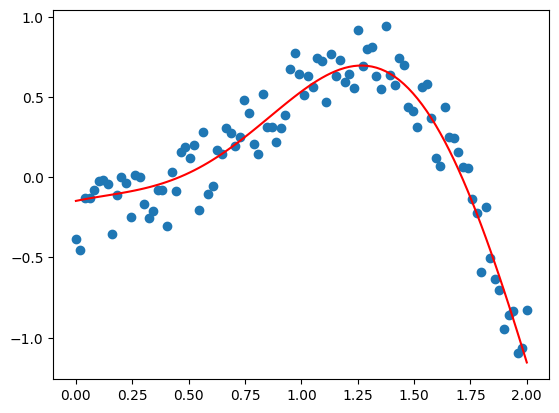

In [10]:
regressor = SVR(kernel='rbf', C=optimal_C, gamma=optimal_G, epsilon=0)
regressor.fit(x, y)
yp = regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, yp, 'r')
plt.show()

In [11]:
gammas = np.linspace(0.5, 2, 4)
Cs = np.linspace(40, 70, 7)

In [12]:
scores = np.empty((Cs.shape[0], gammas.shape[0]))

for i in range(Cs.shape[0]):
    for j in range(gammas.shape[0]):
        regressor = SVR(kernel='poly', degree=3, coef0=1, C=Cs[i], gamma=gammas[j], epsilon=0)
        scores[i][j] = cross_val_score(regressor, x, y, scoring=mse_scorer, cv=5).mean()

i, j = np.unravel_index(scores.argmin(), scores.shape)
optimal_C = Cs[i]
optimal_G = gammas[j]
print("optimal C for poly kernel:", optimal_C)
print("optimal gamma for poly kernel:", optimal_G)
print("optimal error for poly kernel:", scores.min())

optimal C for poly kernel: 55.0
optimal gamma for poly kernel: 0.5
optimal error for poly kernel: 0.02528002022941071


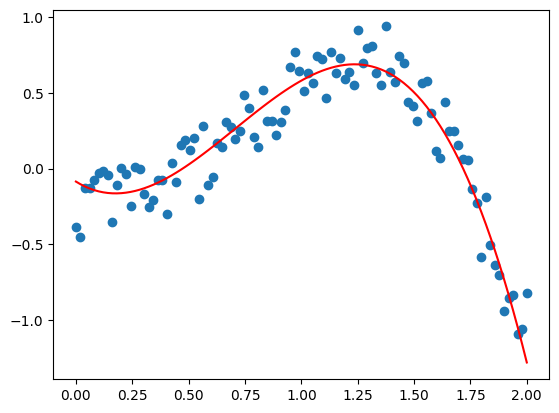

In [13]:
regressor = SVR(kernel='poly', degree=3, coef0=1, C=optimal_C, gamma=optimal_G, epsilon=0)
regressor.fit(x, y)
yp = regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, yp, 'r')
plt.show()